In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv("dataset/housing.csv")
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


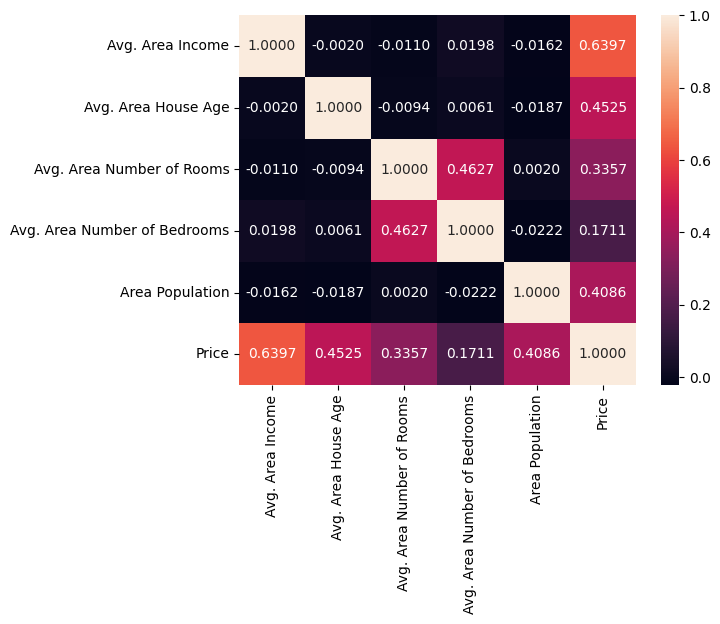

In [5]:
sns.heatmap(df.drop("Address", axis=1).corr(), fmt="1.4f", annot= True)
plt.show()

In [6]:
df["Address"].sample(5)

1969    2803 Hall Garden Suite 357\nEast Carlos, ND 24...
1689              43213 Allen Lake\nMorrismouth, SC 66122
1230    4882 Jeremy Ferry\nEast Sharonberg, ID 41904-9783
2262          42201 Brandon Brooks\nEast Justin, MT 68266
2362       549 Mccoy Forges Apt. 808\nRojasside, KY 46664
Name: Address, dtype: object

In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
for cols in df.columns:
    print(cols, ": ", df[cols].nunique())

Avg. Area Income :  5000
Avg. Area House Age :  5000
Avg. Area Number of Rooms :  5000
Avg. Area Number of Bedrooms :  255
Area Population :  5000
Price :  5000
Address :  5000


In [9]:
# Dropping Address Column because it is neither continuous numerical nor categorical

cols= ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']

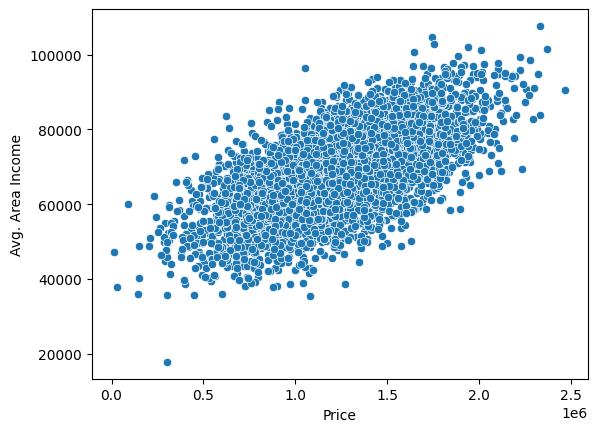

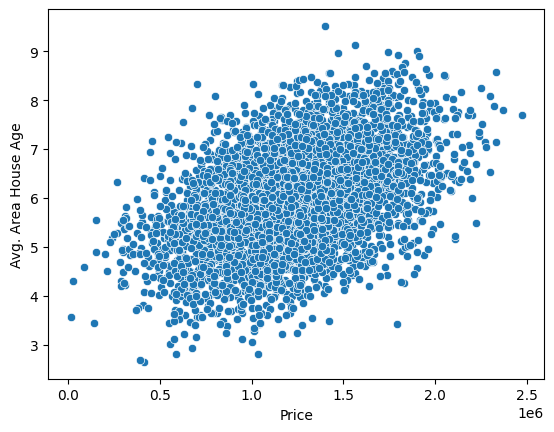

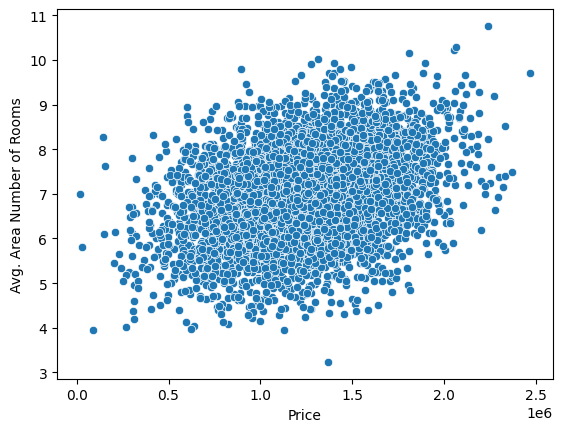

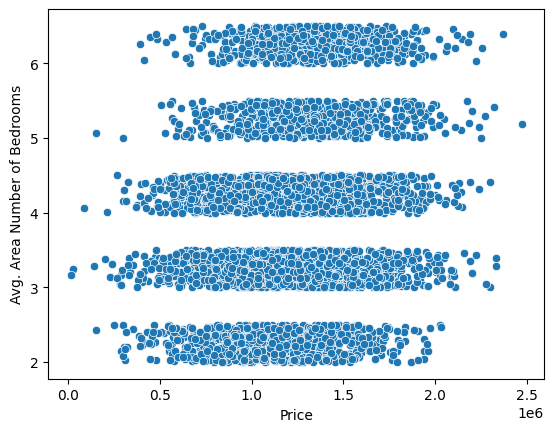

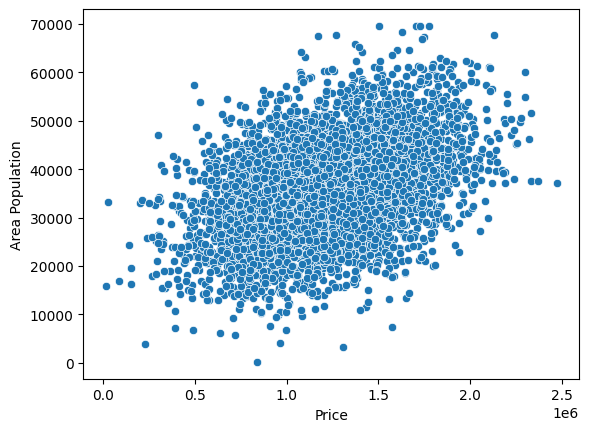

In [10]:
for col in cols:
    sns.scatterplot(df, x= "Price", y=col)
    plt.show()

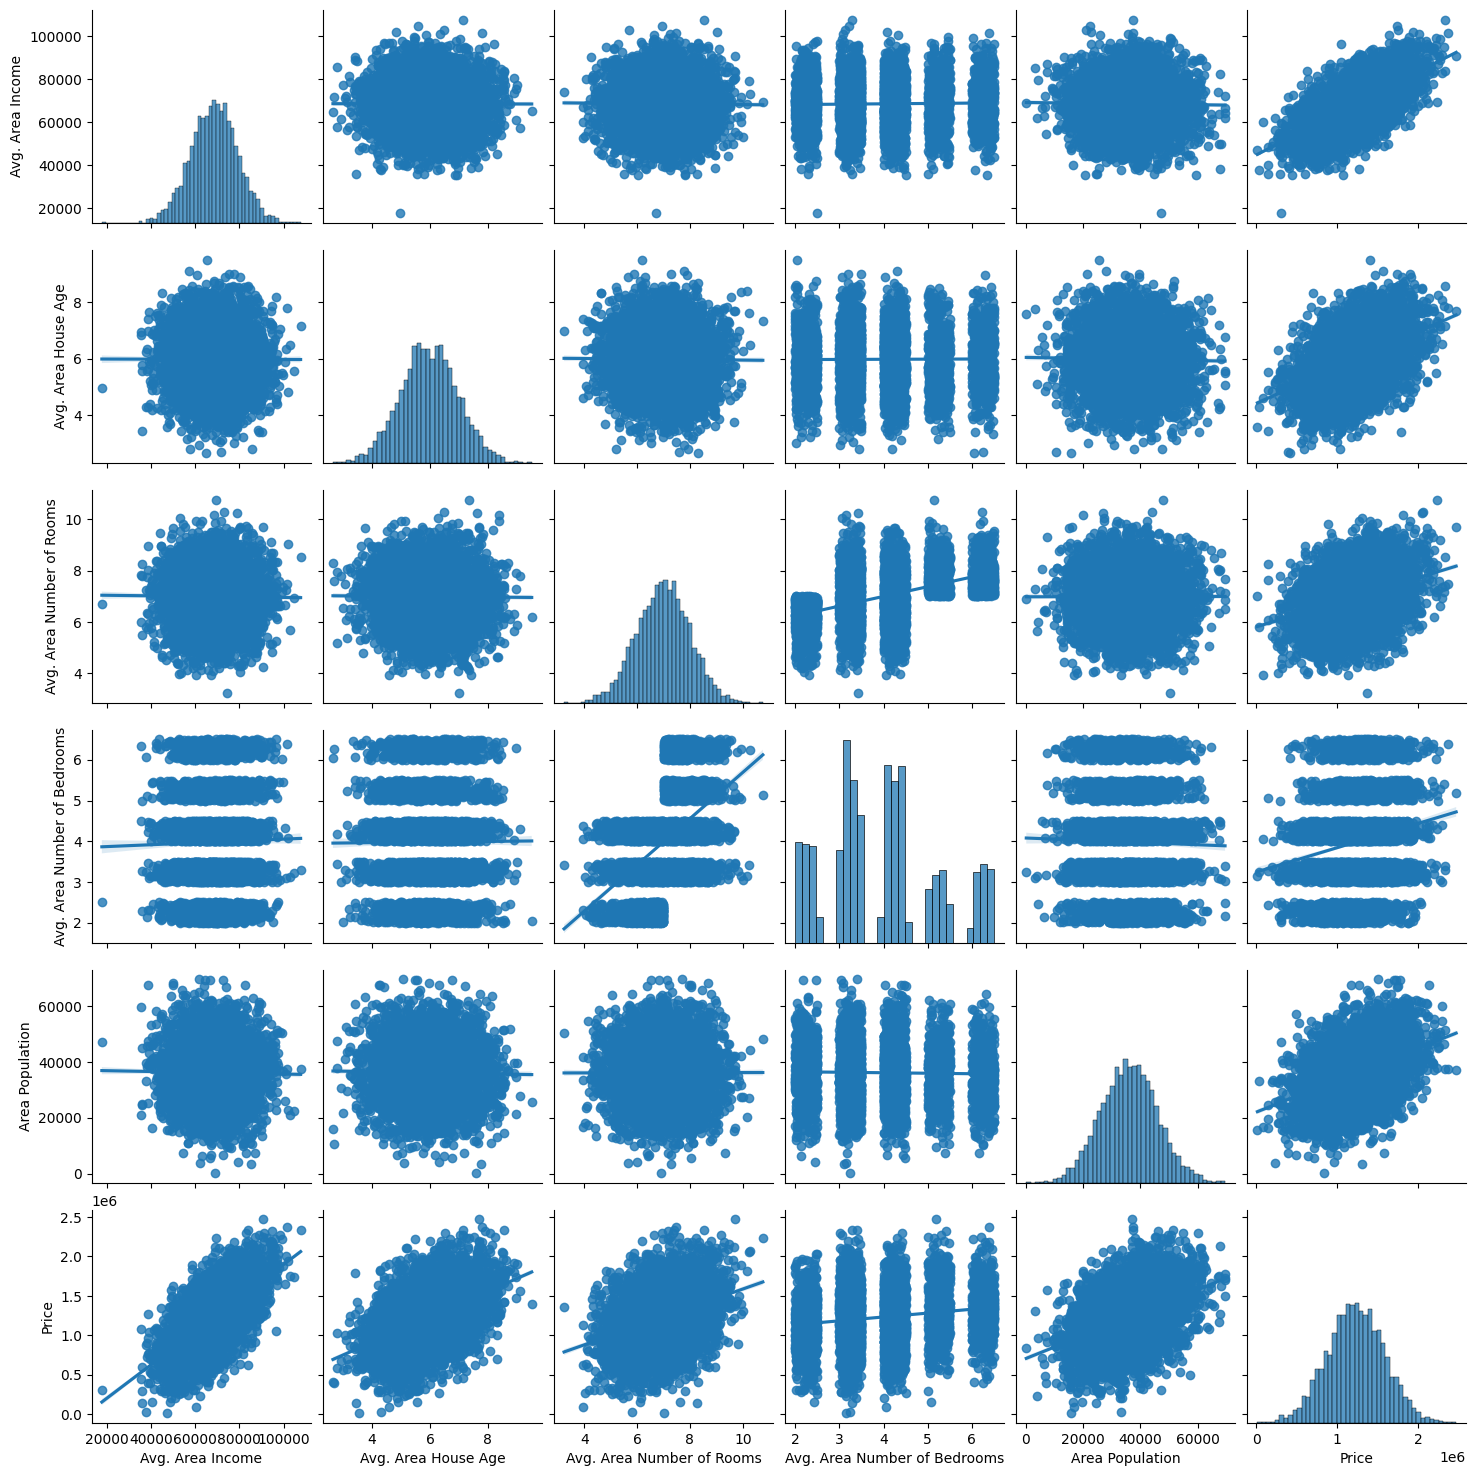

In [11]:
sns.pairplot(df, kind= "reg")

In [12]:
# Dropping Bedroom columns because of its less corelation to the Price column
cols.remove("Avg. Area Number of Bedrooms")
cols

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Area Population']

In [13]:
X= df[cols]
y= df["Price"]
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472
...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035
4996,78491.275435,6.999135,6.576763,25616.115489
4997,63390.686886,7.250591,4.805081,33266.145490
4998,68001.331235,5.534388,7.130144,42625.620156


In [14]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state= 100)

In [15]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
1264,96778.121065,4.569411,7.827748,37480.700048
1662,76388.551958,5.588038,6.845532,36841.176143
98,65984.750645,6.512270,6.316480,21867.476940
2347,51168.428595,7.511730,7.083326,30369.193120
749,50144.739884,6.121600,7.647020,43233.324998


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model= LinearRegression()

In [18]:
model.fit(X_train, y_train)
type(model)

sklearn.linear_model._base.LinearRegression

In [25]:
model.score(X_test, y_test) * 100

91.97684957773612

In [20]:
model.coef_

array([2.15187934e+01, 1.66191391e+05, 1.21396670e+05, 1.52797822e+01])

In [26]:
print(model.intercept_)

-2637073.5019567483


In [21]:
weigs= pd.DataFrame(model.coef_, index= model.feature_names_in_, columns=["coef"])
weigs

,coef
Avg. Area Income,21.518793
Avg. Area House Age,166191.391107
Avg. Area Number of Rooms,121396.670295
Area Population,15.279782


In [22]:
pd.to_pickle(model, "WebApp/HousePricePredictor.pkl")